In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv("preprocessed_5.csv")
df

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
0,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A5,A5309,1,4500
1,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A4,A4102,1,18000
2,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A5,A5107,1,1800
3,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A6,A6109,1,100
4,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A4,A4200,1,18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407436,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A6,A6112,1,240
407437,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A1,A1300,2,80000
407438,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A5,A5100,2,240
407439,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A5,A5107,1,4000


In [4]:
df.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'BTH_YR', 'GENDER', 'IS_KRN', 'AGE',
       'SCTR_CD', 'COM_SN', 'POL_SN', 'GIS_CD', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_ST_DT', 'CT_END_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD',
       'CT_CHNL_CD', 'INSU_DAYS', 'INSU_YEAR', 'MGG_GRP_CD', 'MGG_CD',
       'MGG_CNT', 'MGG_AMT_SUM'],
      dtype='object')

In [5]:
df_t = df[df.INS_GBN_CD == 14]
df_t

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
1681,195908,1,1993,1,1,30,6,7163853,8006336,21,...,250,1,0,1,184,1,A1,A1399,1,32000
1682,195908,1,1993,1,1,30,6,7163853,8006336,21,...,250,1,0,1,184,1,A1,A1399,1,32000
2230,880454,1,1992,2,1,31,6,2443,545678,31,...,16,1,0,7,31,1,A4,A4199,1,160
2231,880454,1,1992,2,1,31,6,2443,545678,31,...,16,1,0,7,31,1,A1,A1100,1,16000
2232,880454,1,1992,2,1,31,6,2443,545678,31,...,16,1,0,7,31,1,A3,A3101,1,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406532,979312,1,2002,1,1,21,6,5695546,2137903,23,...,18,1,0,5,30,1,A94,A9499,1,1300
406533,979312,1,2002,1,1,21,6,5695546,2137903,23,...,18,1,0,5,30,1,A3,A3101,1,10000
406534,979312,1,2002,1,1,21,6,5695546,2137903,23,...,18,1,0,5,30,1,A1,A1399,1,270000
406535,979312,1,2002,1,1,21,6,5695546,2137903,23,...,18,1,0,5,30,1,A94,A9499,1,1300


## 담보(코드, 그룹코드) 구성

In [6]:
df_t.MGG_GRP_CD.unique()

array(['A1', 'A4', 'A3', 'A6', 'A99', 'A94'], dtype=object)

In [7]:
grouped = df_t.groupby("INS_GBN_CD")

In [8]:
for key, group in grouped:
    print("보험종류", key)
    for n in group.MGG_GRP_CD.unique():
        print(n, df_t[df_t["MGG_GRP_CD"] == n].MGG_CD.unique())

보험종류 14
A1 ['A1399' 'A1100' 'A1300' 'A1199']
A4 ['A4199']
A3 ['A3101' 'A3300' 'A3399' 'A3199' 'A3100' 'A3303']
A6 ['A6300' 'A6100' 'A6999']
A99 ['A9999']
A94 ['A9499']


In [9]:
# 치환
df_t['MGG_GRP_CD_'] = df_t["MGG_GRP_CD"].replace(['A1', 'A4', 'A3', 'A6', 'A99', 'A94'],
                          ['사망', '진단', '후유장해', '입원일당', '기타', '위로금'], inplace=False)

C:\Users\MULTIC~1\AppData\Local\Temp/ipykernel_17176/225054449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['MGG_GRP_CD_'] = df_t["MGG_GRP_CD"].replace(['A1', 'A4', 'A3', 'A6', 'A99', 'A94'],


In [10]:
df_t

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_
1681,195908,1,1993,1,1,30,6,7163853,8006336,21,...,1,0,1,184,1,A1,A1399,1,32000,사망
1682,195908,1,1993,1,1,30,6,7163853,8006336,21,...,1,0,1,184,1,A1,A1399,1,32000,사망
2230,880454,1,1992,2,1,31,6,2443,545678,31,...,1,0,7,31,1,A4,A4199,1,160,진단
2231,880454,1,1992,2,1,31,6,2443,545678,31,...,1,0,7,31,1,A1,A1100,1,16000,사망
2232,880454,1,1992,2,1,31,6,2443,545678,31,...,1,0,7,31,1,A3,A3101,1,10000,후유장해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406532,979312,1,2002,1,1,21,6,5695546,2137903,23,...,1,0,5,30,1,A94,A9499,1,1300,위로금
406533,979312,1,2002,1,1,21,6,5695546,2137903,23,...,1,0,5,30,1,A3,A3101,1,10000,후유장해
406534,979312,1,2002,1,1,21,6,5695546,2137903,23,...,1,0,5,30,1,A1,A1399,1,270000,사망
406535,979312,1,2002,1,1,21,6,5695546,2137903,23,...,1,0,5,30,1,A94,A9499,1,1300,위로금


In [11]:
df_t.groupby("CT_PY_PD").mean().INSU_DAYS

CT_PY_PD
0    63.979513
1    31.000000
Name: INSU_DAYS, dtype: float64

In [12]:
# 납입기간이 1일때?
df_t[df_t.CT_PY_PD == 1].INSU_DAYS

180137    31
180138    31
180139    31
180140    31
302690    31
302691    31
302692    31
302693    31
302694    31
302695    31
302696    31
302697    31
302698    31
302699    31
Name: INSU_DAYS, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INSU_DAYS', ylabel='Density'>

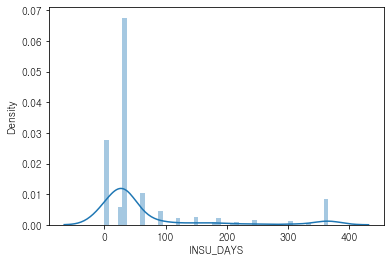

In [13]:
sns.distplot(df_t[df_t.CT_PY_PD == 0]["INSU_DAYS"])

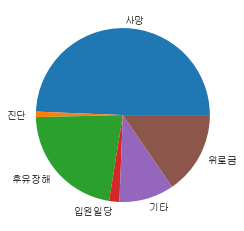

In [14]:
grouped = df_t.groupby("MGG_GRP_CD_").count()

mgg_arr = []
labels = []

for i in df_t.MGG_GRP_CD_.unique():
    mgg_arr.append(grouped["JOIN_SN"][i])
    labels.append(i)
plt.pie(mgg_arr, labels=labels)
plt.show()

## 납입주기코드 먼저 봐서 연납.월납.일시납 중 뭐가 많은지

In [15]:
df_t.groupby("CT_PY_CYCLE_CD").count() # 모두 1 => 일시납

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,,,,
1,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,...,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576


## 가장 많이 선택된 납입코드의 납입기간은 어떤 비율인지.

In [16]:
df_t[df_t.CT_PY_CYCLE_CD == 1].groupby("CT_PY_PD").count().JOIN_SN

CT_PY_PD
0    1562
1      14
Name: JOIN_SN, dtype: int64

## 보험기간(종기월 - 시기월)의 비율을 어떠한지

In [17]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 1681 to 406536
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JOIN_SN         1576 non-null   int64 
 1   JOIN_SN_TYP     1576 non-null   int64 
 2   BTH_YR          1576 non-null   int64 
 3   GENDER          1576 non-null   int64 
 4   IS_KRN          1576 non-null   int64 
 5   AGE             1576 non-null   int64 
 6   SCTR_CD         1576 non-null   int64 
 7   COM_SN          1576 non-null   int64 
 8   POL_SN          1576 non-null   int64 
 9   GIS_CD          1576 non-null   int64 
 10  INS_GBN_CD      1576 non-null   int64 
 11  INS_CT_STAT_CD  1576 non-null   int64 
 12  CT_ST_DT        1576 non-null   object
 13  CT_END_DT       1576 non-null   object
 14  CT_PY_AMT       1576 non-null   int64 
 15  CT_PY_CYCLE_CD  1576 non-null   int64 
 16  CT_PY_PD        1576 non-null   int64 
 17  CT_CHNL_CD      1576 non-null   int64 
 18  INS

In [18]:
df_t[["CT_END_DT", "CT_ST_DT", "INSU_DAYS"]].head()

,CT_END_DT,CT_ST_DT,INSU_DAYS
1681,2020-01-01,2019-07-01,184
1682,2020-01-01,2019-07-01,184
2230,2018-09-01,2018-08-01,31
2231,2018-09-01,2018-08-01,31
2232,2018-09-01,2018-08-01,31


In [19]:
# df_t['CT_END_DT'] = pd.to_datetime(df_t['CT_END_DT'], format='%Y%m', errors='coerce')
# df_t['CT_ST_DT'] = pd.to_datetime(df_t['CT_ST_DT'], format='%Y%m', errors='coerce')

In [20]:
# 보장기간(CT_PD) 컬럼 생성

# df_t['CT_PD'] = (df_t['CT_END_DT'] - df_t['CT_ST_DT']).dt.days

In [21]:
# df_t[["CT_END_DT", "CT_ST_DT", "CT_PD"]].head(50)

In [22]:
# df_t[df_t.CT_PD == 0][["CT_END_DT", "CT_ST_DT"]]

In [23]:
df_t.INSU_DAYS.describe()

count    1576.000000
mean       63.686548
std        94.474947
min         0.000000
25%        30.000000
50%        31.000000
75%        60.000000
max       366.000000
Name: INSU_DAYS, dtype: float64

In [24]:
df_t.INSU_DAYS.unique()

array([184,  31, 181,  30,   0,  60, 365, 213, 183,  28,  61, 153,  59,
       122, 366, 306, 305,  29, 123, 244, 214, 334,  90,  91,  92, 150,
        62, 152, 303, 243, 304, 212, 120, 335], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INSU_DAYS', ylabel='CT_PY_AMT'>

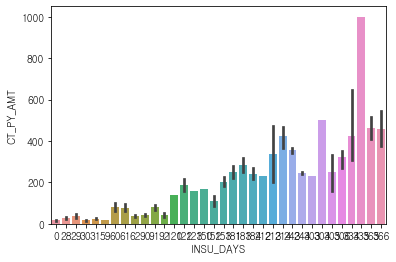

In [25]:
# 보장기간별 납입금액 분포
sns.barplot(df_t["INSU_DAYS"], df_t["CT_PY_AMT"])

In [26]:
# 보장기간이 한달인 경우의 납입보험료
# df_t[df_t.CT_PD == 1].groupby("CT_PY_AMT").count()

In [27]:
# 보장기간 한달의 납입금액 비율 시각화 (천단위)
# df_group = df_t[df_t.CT_PD == 1].groupby("CT_PY_AMT").count()
# df_group = df_t.groupby("INSU_DAYS").count()

# CT_PD_arr = []
# labels=[]
# for i in df_t[df_t.CT_PD == 1].CT_PY_AMT.unique():
#     CT_PD_arr.append(df_group["JOIN_SN"][i])
#     labels.append(i)
# plt.pie(CT_PD_arr, labels=labels)
# plt.show()

In [28]:
len(df_t[df_t.INSU_DAYS >= 365])

98

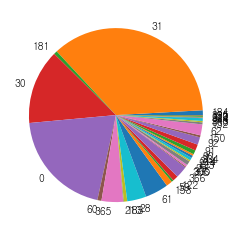

In [29]:
# 보장기간 비율 시각화 (월단위)

df_group = df_t.groupby("INSU_DAYS").count()

CT_PD_arr = []
labels=[]
for i in df_t.INSU_DAYS.unique():
    CT_PD_arr.append(df_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(CT_PD_arr, labels=labels)
plt.show()

# 31일이 가장 많다 => 한 달 데이터를 가지고 => 1/2 일주일로 변환 (일주일 디폴트)

In [30]:
# 한달이하, 한달
# len(df_t[df_t["CT_PD"] == 0]), len(df_t[df_t["CT_PD"] == 1])

In [31]:
df_t = df_t[(df_t.INSU_DAYS == 29) | (df_t.INSU_DAYS == 30) | (df_t.INSU_DAYS == 31)]

In [32]:
# 납입금액 1/2

df_t["CT_PY_AMT"] = df_t["CT_PY_AMT"] / 3

C:\Users\MULTIC~1\AppData\Local\Temp/ipykernel_17176/1475729797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["CT_PY_AMT"] = df_t["CT_PY_AMT"] / 3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INSU_DAYS', ylabel='CT_PY_AMT'>

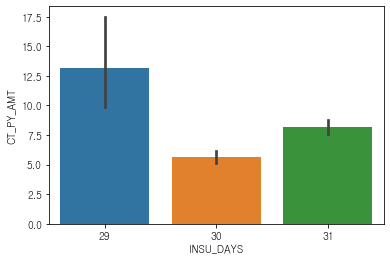

In [33]:
# 전처리 후 보장기간 별 납입금액
sns.barplot(df_t["INSU_DAYS"], df_t["CT_PY_AMT"])

In [34]:
df_t.CT_PY_AMT.describe() #8천원~만원 3으로 나누기

count    799.000000
mean       7.556529
std        6.706219
min        0.666667
25%        3.000000
50%        5.333333
75%        9.333333
max       40.000000
Name: CT_PY_AMT, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CT_PY_AMT', ylabel='Density'>

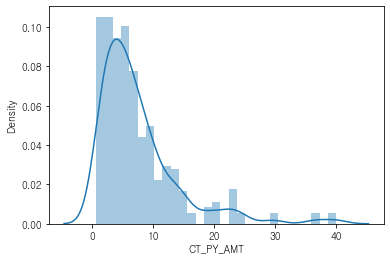

In [35]:
# 납입금액 분포
sns.distplot(df_t["CT_PY_AMT"]) #일주일 디폴트

In [36]:
df_t[["CT_PY_AMT"]]

,CT_PY_AMT
2230,5.333333
2231,5.333333
2232,5.333333
2233,5.333333
2234,5.333333
...,...
406532,6.000000
406533,6.000000
406534,6.000000
406535,6.000000


## 연령, 성별에 따른 추가 분석

In [37]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8

In [38]:
df_t["AGE_CAT"] = df_t["AGE"].apply(category_age)
df_t

C:\Users\MULTIC~1\AppData\Local\Temp/ipykernel_17176/1160294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["AGE_CAT"] = df_t["AGE"].apply(category_age)


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
2230,880454,1,1992,2,1,31,6,2443,545678,31,...,0,7,31,1,A4,A4199,1,160,진단,3
2231,880454,1,1992,2,1,31,6,2443,545678,31,...,0,7,31,1,A1,A1100,1,16000,사망,3
2232,880454,1,1992,2,1,31,6,2443,545678,31,...,0,7,31,1,A3,A3101,1,10000,후유장해,3
2233,880454,1,1992,2,1,31,6,2443,545678,31,...,0,7,31,1,A6,A6300,1,100,입원일당,3
2234,880454,1,1992,2,1,31,6,2443,545678,31,...,0,7,31,1,A6,A6100,1,100,입원일당,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406532,979312,1,2002,1,1,21,6,5695546,2137903,23,...,0,5,30,1,A94,A9499,1,1300,위로금,2
406533,979312,1,2002,1,1,21,6,5695546,2137903,23,...,0,5,30,1,A3,A3101,1,10000,후유장해,2
406534,979312,1,2002,1,1,21,6,5695546,2137903,23,...,0,5,30,1,A1,A1399,1,270000,사망,2
406535,979312,1,2002,1,1,21,6,5695546,2137903,23,...,0,5,30,1,A94,A9499,1,1300,위로금,2


In [39]:
df_t.groupby("AGE_CAT").CT_PY_AMT.mean()

AGE_CAT
1     3.666667
2     6.129129
3     6.377049
4     7.274939
5     9.444444
6    10.724638
7    22.166667
8    18.666667
Name: CT_PY_AMT, dtype: float64

In [40]:
df_t.groupby("GENDER").count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
GENDER,,,,,,,,,,,,,,,,,,,,,
1,396,396,396,396,396,396,396,396,396,396,...,396,396,396,396,396,396,396,396,396,396
2,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403


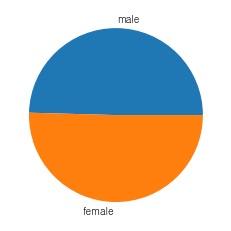

In [41]:
# 성별

gender_cnt = df_t.groupby("GENDER").count()
male = gender_cnt["JOIN_SN"][1]
female = gender_cnt["JOIN_SN"][2]

plt.pie([male, female], labels=["male", "female"])
plt.show()

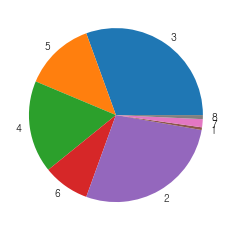

In [42]:
# 연령
age_arr = []
labels = []

age_cnt = df_t.groupby("AGE_CAT").count()
for i in df_t["AGE_CAT"].unique():
    age_arr.append(age_cnt["JOIN_SN"][i])
    labels.append(i)
    
plt.pie(age_arr, labels=labels)
plt.show()

In [43]:
df_t.groupby("AGE_CAT").count().JOIN_SN

AGE_CAT
1      4
2    222
3    244
4    137
5    105
6     69
7     12
8      6
Name: JOIN_SN, dtype: int64

In [44]:
# 나이대별 납입보험료
df_t.groupby("AGE_CAT").mean().CT_PY_AMT # 나이가 많을수록 대체로 비쌈. 80대는?

AGE_CAT
1     3.666667
2     6.129129
3     6.377049
4     7.274939
5     9.444444
6    10.724638
7    22.166667
8    18.666667
Name: CT_PY_AMT, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE_CAT', ylabel='CT_PY_AMT'>

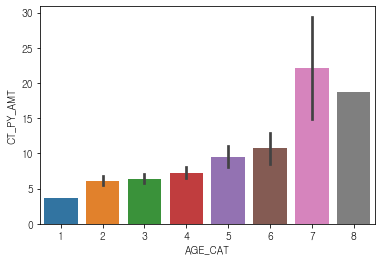

In [45]:
sns.barplot(df_t["AGE_CAT"], df_t["CT_PY_AMT"])

---

In [46]:
dfs = {}
for a in df_t.MGG_GRP_CD_.unique():
    dfs[a] = df_t[df_t["MGG_GRP_CD_"] == a]

In [47]:
df_t.MGG_GRP_CD_.unique()

array(['진단', '사망', '후유장해', '입원일당', '기타', '위로금'], dtype=object)

In [48]:
df_t.groupby("GENDER").count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
GENDER,,,,,,,,,,,,,,,,,,,,,
1,396,396,396,396,396,396,396,396,396,396,...,396,396,396,396,396,396,396,396,396,396
2,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403


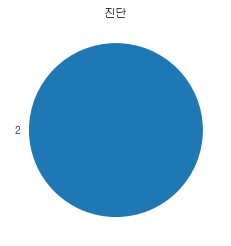

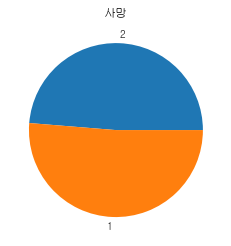

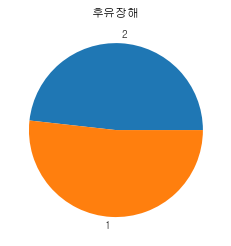

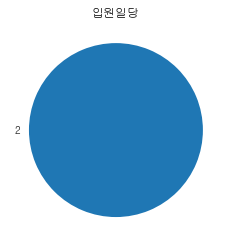

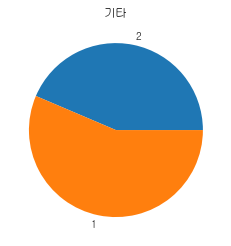

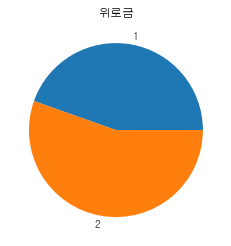

In [49]:
# 보험담보그룹 별 성별 비율

for a in df_t.MGG_GRP_CD_.unique():
    arr = []
    labels = []
    df = dfs[a]
    df.groupby("GENDER").count()
    gender_cnt = df.groupby("GENDER").count()
    for i in df.GENDER.unique():
        arr.append(gender_cnt["JOIN_SN"][i])
        labels.append(i)
#     female = gender_cnt["JOIN_SN"][2]

#     labels = ["male", "female"]

    plt.pie(arr, labels=labels)
    plt.title(a)
    plt.show()

[3 2]


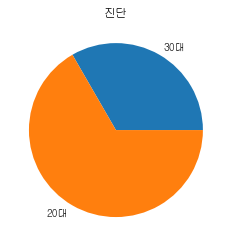

[3 5 4 6 2 7 8]


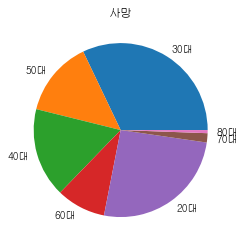

[3 4 6 5 2 1 7 8]


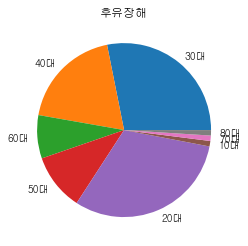

[3 2]


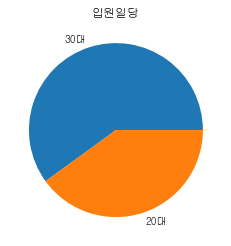

[3 5 4 6 2 7]


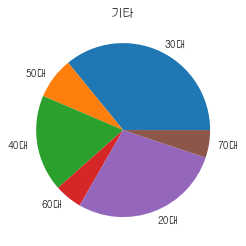

[3 4 6 5 2 1 8]


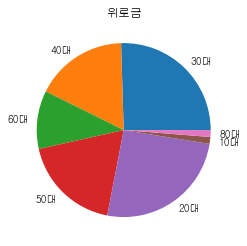

In [50]:
# 보험담보그룹 별 나이대 비율

for a in df_t.MGG_GRP_CD_.unique():
    df = dfs[a]
    age_cnt = df.groupby("AGE_CAT").count()
    age_arr = []
    labels = []
    print(df.AGE_CAT.unique())
#     print(age_cnt)
    for i in df.AGE_CAT.unique():
        if age_cnt["AGE"][i]:
            age_arr.append(age_cnt["AGE"][i])
            labels.append(f"{i}0대")
    plt.pie(age_arr, labels=labels)
    plt.title(a)
    plt.show()

['A94' 'A3']


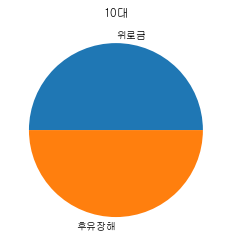

['A1' 'A3' 'A94' 'A99' 'A4' 'A6']


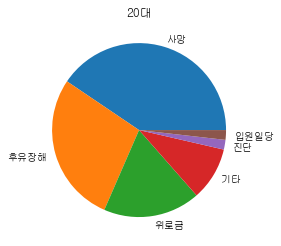

['A4' 'A1' 'A3' 'A6' 'A99' 'A94']


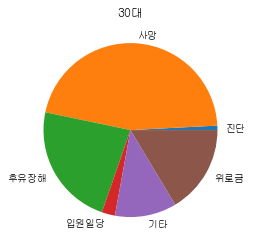

['A94' 'A1' 'A3' 'A99']


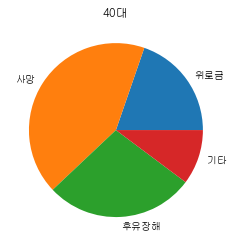

['A99' 'A1' 'A3' 'A94']


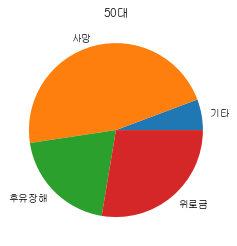

['A1' 'A3' 'A94' 'A99']


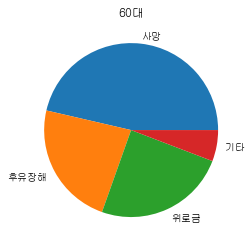

['A1' 'A99' 'A3']


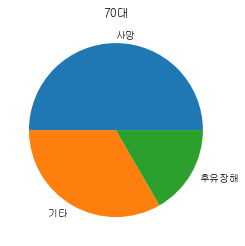

['A1' 'A94' 'A3']


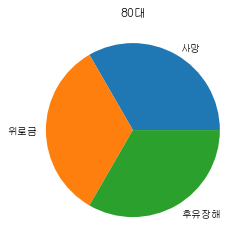

In [51]:
# 나이대별 보험담보그룹 비율

dfs_age = {}
for n in df_t.AGE_CAT.unique():
    dfs_age[n] = df_t[df_t["AGE_CAT"] == n]
    
for n in sorted(df_t.AGE_CAT.unique()):
    df = dfs_age[n]
    mgg_cnt = df.groupby("MGG_GRP_CD_").count()
    mgg_arr = []
    labels = []
    print(df.MGG_GRP_CD.unique())
#     print(age_cnt)
    for i in df.MGG_GRP_CD_.unique():
        if mgg_cnt["JOIN_SN"][i]:
            mgg_arr.append(mgg_cnt["JOIN_SN"][i])
            labels.append(i)
    plt.pie(mgg_arr, labels=labels)
    plt.title(f"{n}0대")
    plt.show()

---